In [46]:
import torch
from torch import nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

#matplotlib.use("nbagg")

In [47]:
torch.manual_seed(2021)

In [48]:
TIME_STEP = 20   # lenght of data
INPUT_SIZE = 1   # input size
INIT_LR = 0.02
N_EPOCHS = 100

In [49]:
class myRNN(nn.Module):
    def __init__(self):
        super(myRNN, self).__init__()
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 32,  # hidden layers size
            num_layers = 1     # hidden layers number
        )
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h):
        # x: (time_step, batch_size, input_size)
        # h: (n_layers, batch, hidden_size)
        # out: (time_step, batch_size, hidden_size)
        output, h = self.rnn(x, h)
        prediction = self.out(output)
        return prediction, h

In [50]:
rnn = myRNN()
rnn = rnn.double()
print(rnn)

myRNN(
  (rnn): RNN(1, 32)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [51]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=INIT_LR)
loss_func = nn.MSELoss()
h_state = None

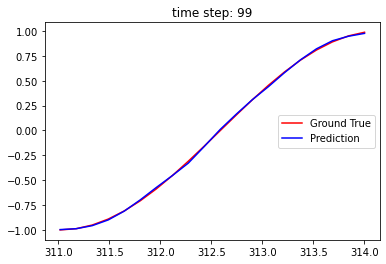

In [53]:
#%matplotlib widget
plt.figure(figsize=(5,5))
#ax = plt.subplot(111)
plt.ion()
for step in range(N_EPOCHS):
    start, end = step*np.pi, (step + 1)*np.pi
    steps = np.linspace(start, end, TIME_STEP, endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np[:, np.newaxis, np.newaxis]) # size: (time_step, batch=1, inputsize=1)
    y = torch.from_numpy(y_np[:, np.newaxis, np.newaxis])
    
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.detach()
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # plot the middle result
    plt.cla() # clear axis
    plt.plot(steps, y_np, 'r-', label='Ground True')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-', label='Prediction')
    plt.title(f'time step: {step}')
    plt.legend(loc=5)
    plt.draw()
    plt.pause(0.1)
    display.clear_output(wait=True)
    
plt.ioff()
plt.show()